In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

In [35]:
TRAIN_PATH='../input/train.csv'
TEST_PATH='../input/test.csv'
SAMPLE_PATH='../input/sample_submission.csv'
MACRO_PATH='../input/macro.csv'

In [65]:
train=pd.read_csv(TRAIN_PATH)
test=pd.read_csv(TEST_PATH)
sample=pd.read_csv(SAMPLE_PATH)
macro=pd.read_csv(MACRO_PATH)

In [4]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [6]:
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


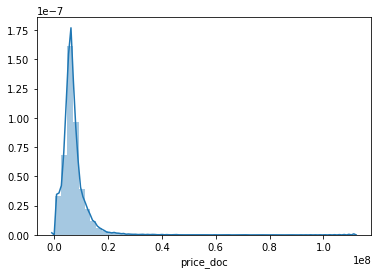

In [12]:
sns.distplot(train['price_doc'])

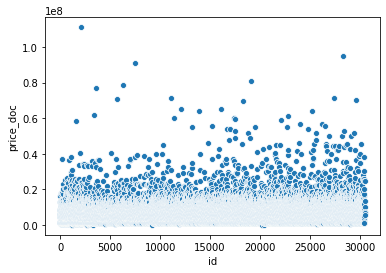

In [13]:
sns.scatterplot(x='id',y='price_doc',data=train)

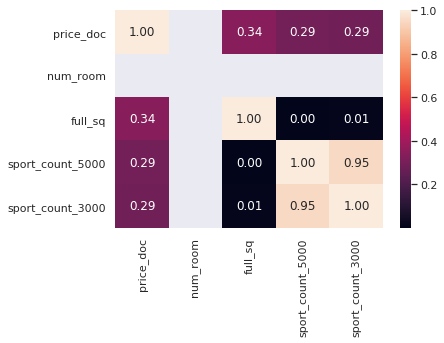

In [66]:
corrmat=train.corr()
cols=corrmat.nlargest(5,'price_doc')['price_doc'].index
cm=np.corrcoef(train[cols].values.T)
sns.heatmap(cm,cbar=True,annot=True,fmt='.2f',yticklabels=cols.values, xticklabels=cols.values)
plt.show()


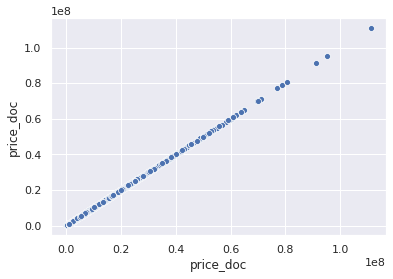

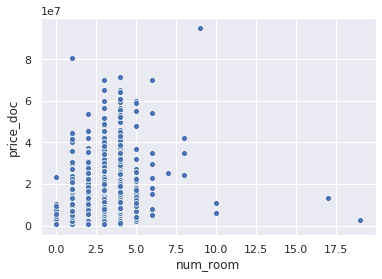

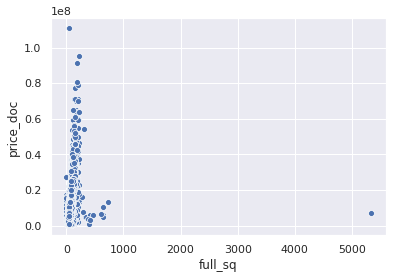

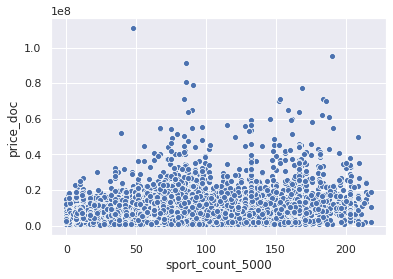

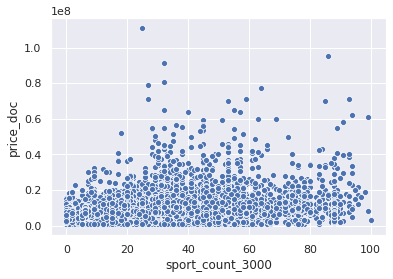

In [67]:
for col in cols:
    sns.scatterplot(x=col,y='price_doc',data=train)
    plt.show()

In [69]:
train=train.drop(train[train['num_room']>10].index)
train=train.drop(train[train['full_sq']>5000].index)
train=train.drop(train[train['price_doc']>1e8].index)


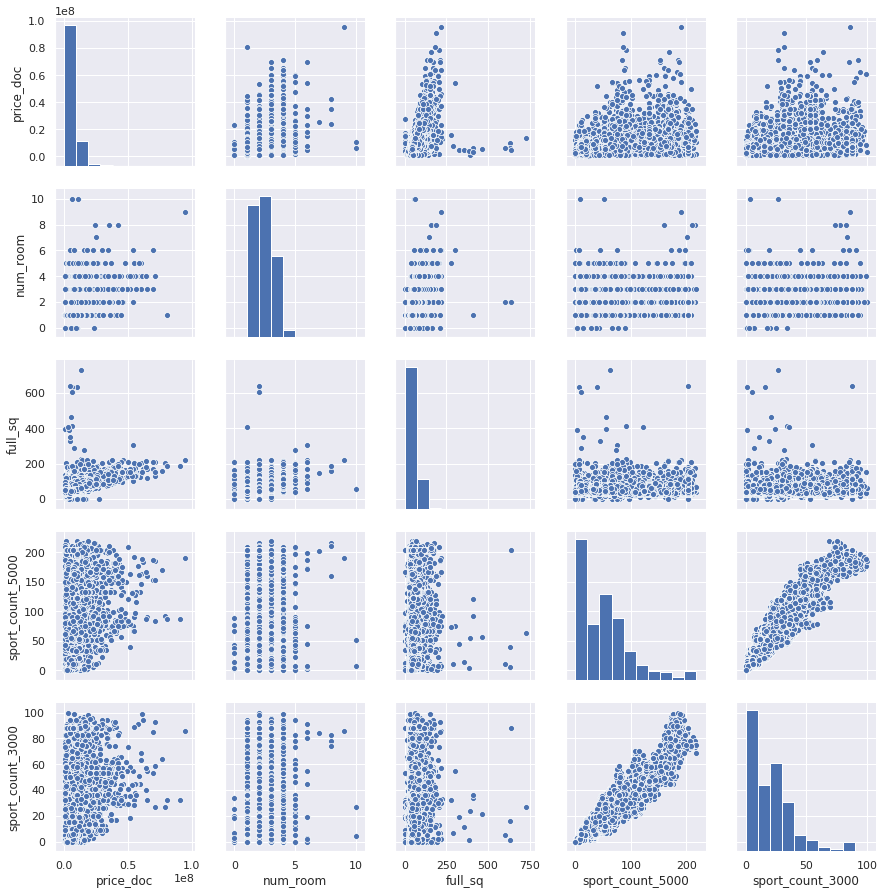

In [70]:
sns.set()
sns.pairplot(train[cols],size=2.5)
plt.show()

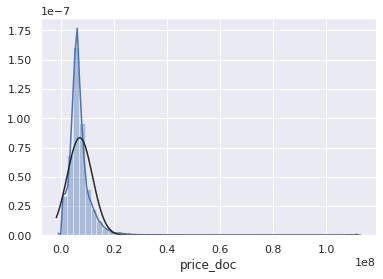

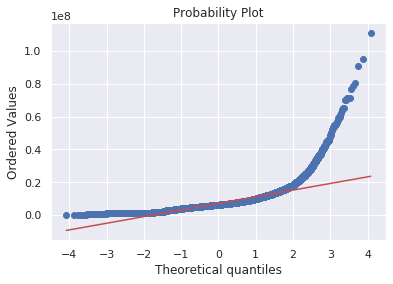

In [48]:
from scipy.stats import norm
sns.distplot(train['price_doc'],fit=norm)
plt.show()
from scipy import stats
# 確率プロット である　QQプロットを一発でかけるのはscipy のみ
fig,ax=plt.subplots()
res=stats.probplot(train['price_doc'],plot=plt)
plt.show()

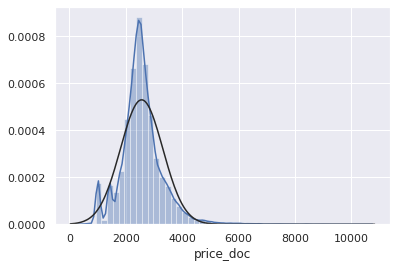

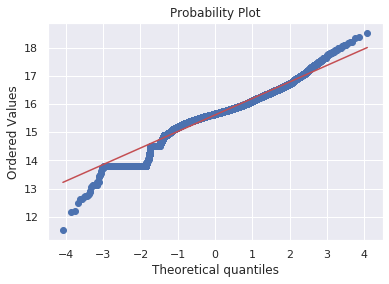

In [49]:
sns.distplot(np.sqrt(train['price_doc']),fit=norm)
plt.show()

from scipy import stats
# 確率プロット である　QQプロットを一発でかけるのはscipy のみ
fig,ax=plt.subplots()
res=stats.probplot(np.log(train['price_doc']),plot=plt)
plt.show()

In [50]:
print(cols)

Index(['price_doc', 'num_room', 'full_sq', 'sport_count_5000',
       'sport_count_3000', 'trc_count_5000', 'sport_count_2000',
       'office_sqm_5000', 'trc_sqm_5000', 'sport_count_1500'],
      dtype='object')


In [75]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train['price_doc']
y_train_log=np.log(y_train)

all_data=pd.concat([train,test]).reset_index(drop=True)
all_data.drop(['price_doc'],axis=1,inplace=True)

In [76]:
all_data.shape

(38129, 291)

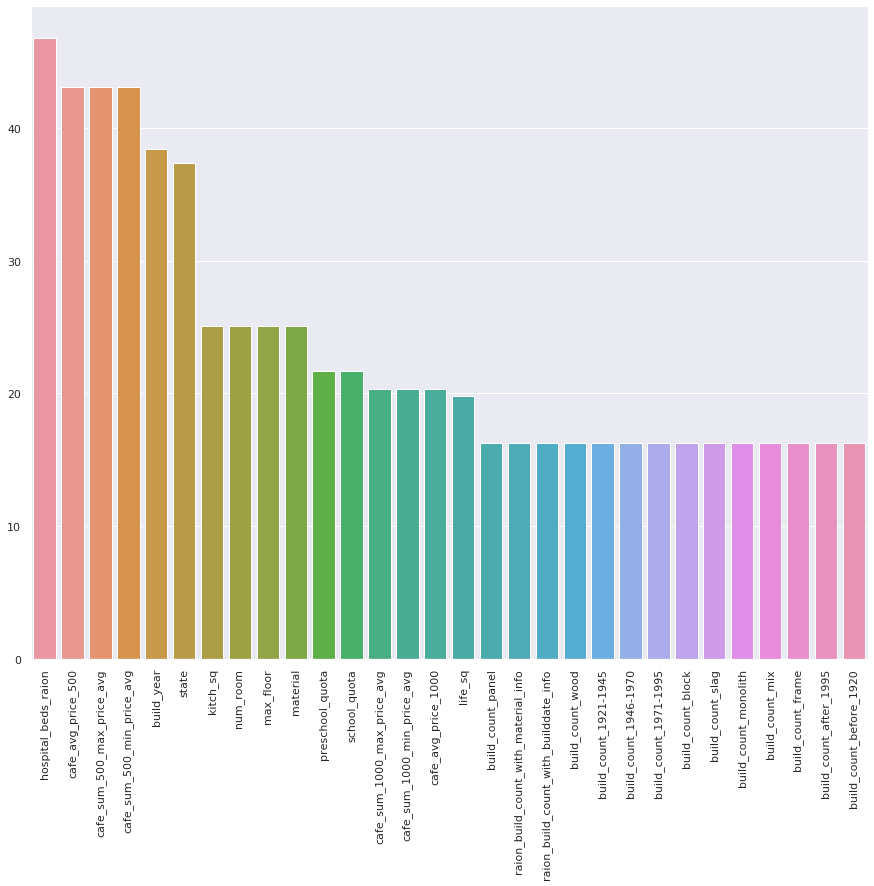

In [79]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
all_data_na[:20]
# seaborn　で棒グラフ
fig,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na[:30].index,y=all_data_na[:30])

In [91]:
all_data=all_data.drop(all_data[all_data_na[all_data_na.values>20].index],axis=1)

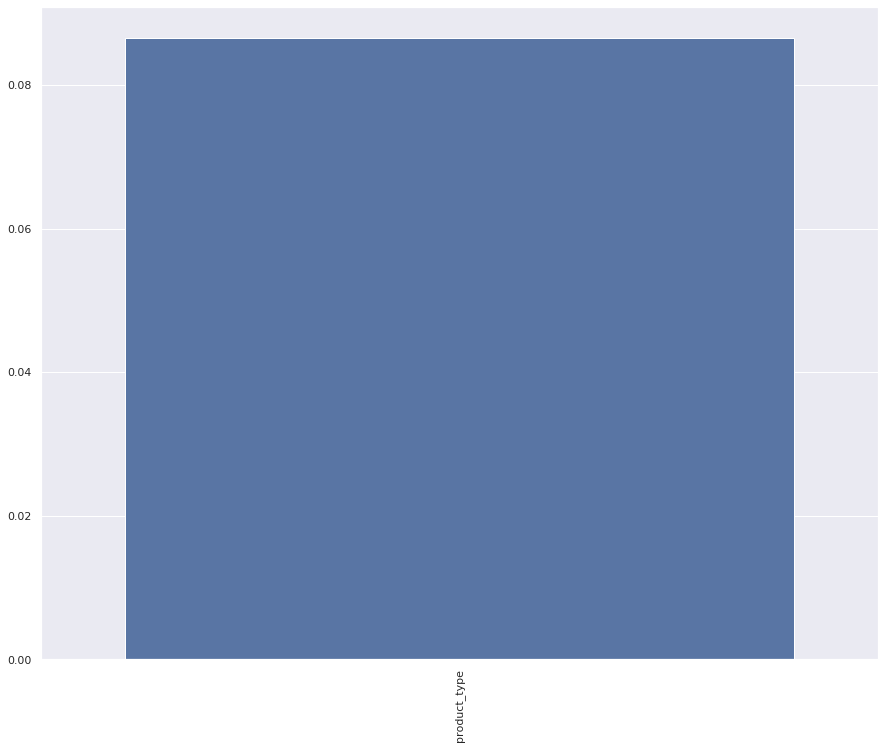

In [121]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

# seaborn　で棒グラフ
fig,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na[:30].index,y=all_data_na[:30])

In [120]:
all_data=all_data.fillna(all_data[all_data_na[all_data_na.values<20].index].mean())

In [124]:
all_data=all_data.drop(['timestamp'],axis=1)

In [126]:
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_columns = None
all_data.info()
# 特定のデータ型のみ取り出しselect_dtypes
cols=all_data.select_dtypes(include=object)

for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c]=lbl.transform(list(all_data[c].values))
print('Shape all_data: {}'.format(all_data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38129 entries, 0 to 38128
Columns: 275 entries, 0_13_all to zd_vokzaly_avto_km
dtypes: float64(105), int64(155), object(15)
memory usage: 80.0+ MB
Shape all_data: (38129, 275)


In [128]:
all_data.head()

,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,16_29_female,16_29_male,7_14_all,7_14_female,7_14_male,ID_big_road1,ID_big_road2,ID_bus_terminal,ID_metro,ID_railroad_station_avto,ID_railroad_station_walk,ID_railroad_terminal,additional_education_km,additional_education_raion,area_m,basketball_km,big_church_count_1000,big_church_count_1500,big_church_count_2000,big_church_count_3000,big_church_count_500,big_church_count_5000,big_church_km,big_market_km,big_market_raion,big_road1_1line,big_road1_km,big_road2_km,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,build_count_before_1920,build_count_block,build_count_brick,build_count_foam,build_count_frame,build_count_mix,build_count_monolith,build_count_panel,build_count_slag,build_count_wood,bulvar_ring_km,bus_terminal_avto_km,cafe_avg_price_1500,cafe_avg_price_2000,cafe_avg_price_3000,cafe_avg_price_5000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_500,cafe_count_1000_price_high,cafe_count_1500,cafe_count_1500_na_price,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000,cafe_count_2000_na_price,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_500,cafe_count_2000_price_high,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_500,cafe_count_3000_price_high,cafe_count_500,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_500,cafe_count_5000_price_high,cafe_count_500_na_price,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_500,cafe_count_500_price_high,cafe_sum_1500_max_price_avg,cafe_sum_1500_min_price_avg,cafe_sum_2000_max_price_avg,cafe_sum_2000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_sum_3000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,catering_km,cemetery_km,children_preschool,children_school,church_count_1000,church_count_1500,church_count_2000,church_count_3000,church_count_500,church_count_5000,church_synagogue_km,culture_objects_top_25,culture_objects_top_25_raion,detention_facility_km,detention_facility_raion,ecology,ekder_all,ekder_female,ekder_male,exhibition_km,female_f,fitness_km,floor,full_all,full_sq,green_part_1000,green_part_1500,green_part_2000,green_part_3000,green_part_500,green_part_5000,green_zone_km,green_zone_part,healthcare_centers_raion,hospice_morgue_km,ice_rink_km,id,incineration_km,incineration_raion,indust_part,industrial_km,kindergarten_km,kremlin_km,leisure_count_1000,leisure_count_1500,leisure_count_2000,leisure_count_3000,leisure_count_500,leisure_count_5000,life_sq,male_f,market_count_1000,market_count_1500,market_count_2000,market_count_3000,market_count_500,market_count_5000,market_shop_km,metro_km_avto,metro_km_walk,metro_min_avto,metro_min_walk,mkad_km,mosque_count_1000,mosque_count_1500,mosque_count_2000,mosque_count_3000,mosque_count_500,mosque_count_5000,mosque_km,museum_km,nuclear_reactor_km,nuclear_reactor_raion,office_count_1000,office_count_1500,office_count_2000,office_count_3000,office_count_500,office_count_5000,office_km,office_raion,office_sqm_1000,office_sqm_1500,office_sqm_2000,office_sqm_3000,office_sqm_500,office_sqm_5000,oil_chemistry_km,oil_chemistry_raion,park_km,power_transmission_line_km,preschool_education_centers_raion,preschool_km,product_type,prom_part_1000,prom_part_1500,prom_part_2000,prom_part_3000,prom_part_500,prom_part_5000,public_healthcare_km,public_tr

In [129]:
X_train=all_data[:ntrain]
X_test=all_data[ntrain:]

In [132]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [138]:
n_folds=5

# デフォルトの交差検証cross_val_scoreではデータのシャッフルが行われないので、シャッフルした訓練データと検証データを用いるようにする
def rmsle_cv(model):
    # K分割交差検証のイテレータを作成、get_n_splits(train.values)で分割して生成されるイテレーション数を取得する,kfはただのint型
    kf=KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    
    #cross_val_score の返り値が指定した性能指標Mean squared error regression lossを返す
    rmse=np.sqrt(-cross_val_score(model,X_train.values,y_train_log,scoring="neg_mean_squared_error",cv=kf))
    return(rmse)

In [139]:
lasso=make_pipeline(RobustScaler(),Lasso(alpha=5e-4,random_state=1))

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.4924 (0.0579)



In [140]:
lasso=make_pipeline(RobustScaler(),Lasso(alpha=5e-4,random_state=1))

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.4924 (0.0579)



In [ ]:
model_xgb=xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))